# Exploratory Data Analysis - Retail

# Author - Chandrika Ghosh

##### Performing " The exploratory analysis" to find out the weak areas where the business manager can make profit. 

data-https://bit.ly/3i4rbWl

In [1]:
import pandas as pd #used to read different datasets
import numpy as np #used to deal with multidimensional arrays or single dimentional arrays
import matplotlib.pyplot as plt #used for data visualisation
import seaborn as sns #used for different statistical functions which will help to visualise the data properly
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/ghosh/Desktop/Python/Datasets/SampleSuperstore.csv')
print(df) 

           Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Categ

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.shape

(9994, 13)

In [7]:
#to see whether there is any null value present in the dataset
df.isnull().sum() #there is no NA present there.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

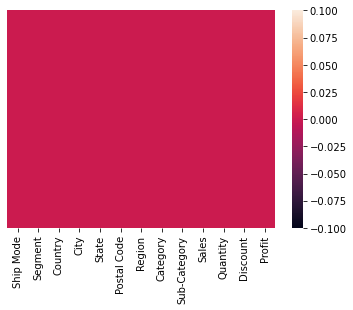

In [8]:
#we can also use heatmap to see whether any null value is present in the dataset
sns.heatmap(df.isnull(), yticklabels = False)

There is no null value present in the dataset as the heatmap is uniformly red

In [9]:
#to check whether there is any duplicate records
df.duplicated().sum()

17

In [10]:
#there are 17 duplicate records lets remove them.
df = df.drop_duplicates()

In [11]:
df.shape

(9977, 13)

### DATA VISUALIZATION AND ANALYSIS OF THE DATASET

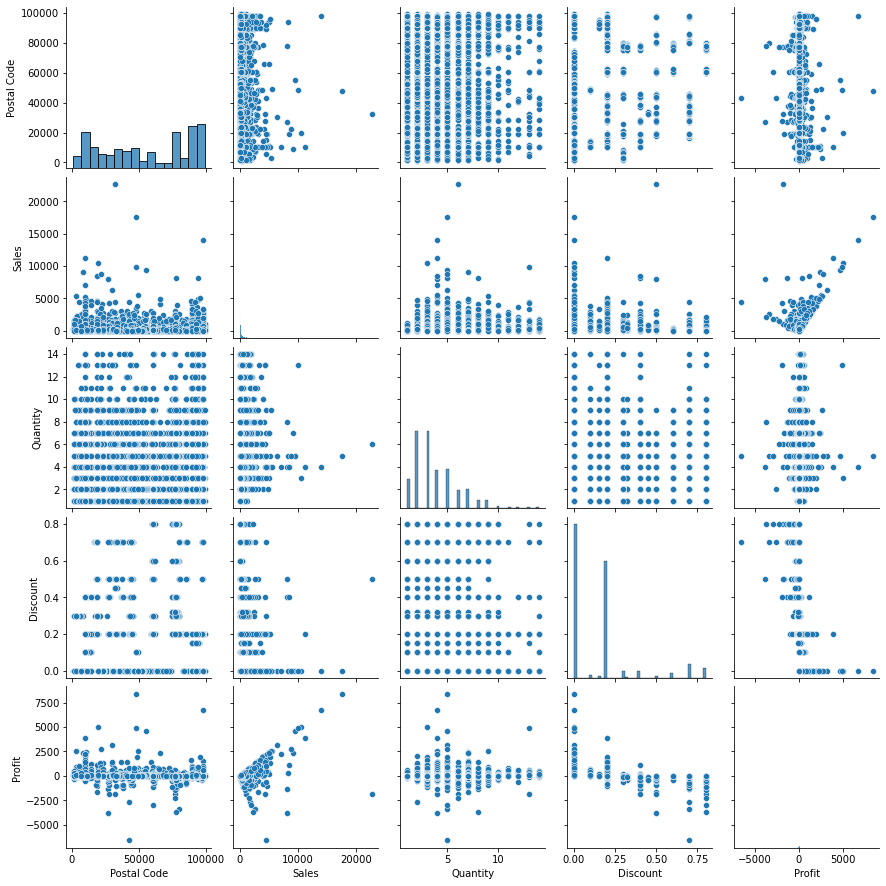

In [12]:
sns.pairplot(df)

From  the pairplot we couldnot get much information regarding the data set. Let us try some other methods.

In [13]:
#let us see the correlation between different variables
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


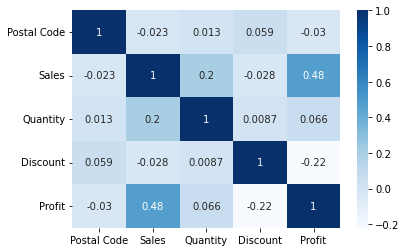

In [14]:
#now let's visualise the correlation using heatmap
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

### On the basis of Category and Sub-Category 

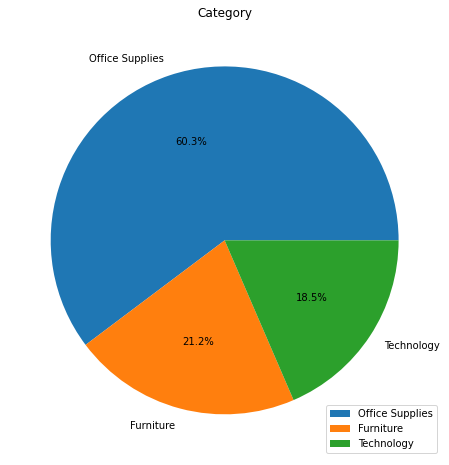

In [15]:
#Now we will see the percentage of transactions made in diferrent categories present in the dataset using a piechart.
plt.figure(figsize = (8,8))
textprops = {'fontsize':10}
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Category')
plt.legend()

From the piechart we can see the dataset mostly includes office supplies with a percentage of 60.3%

C:\Users\ghosh\AppData\Local\Temp/ipykernel_19528/107061408.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

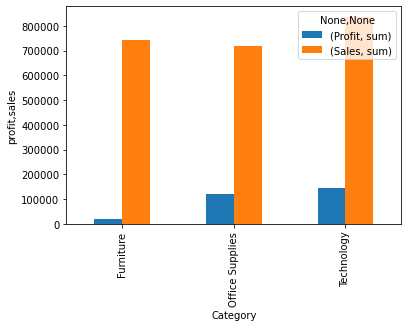

In [48]:
#let us see the profit and sales depending on the categories
plt.figure(figsize = (10,10))
df.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit,sales')
plt.show()

Technology made highest sales and profit. Furniture made lowest profit.

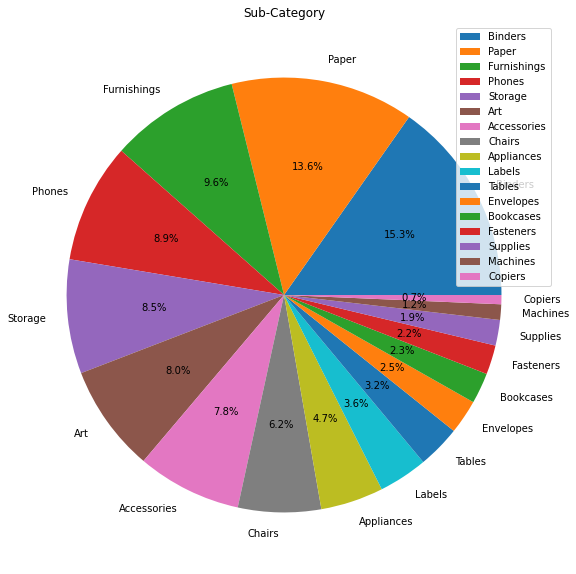

In [16]:
#lets see the sub categories using a pie chart
plt.figure(figsize = (10,10))
textprops = {'fontsize':10}
plt.pie(df['Sub-Category'].value_counts(), labels = df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Sub-Category')
plt.legend()

C:\Users\ghosh\Documents\R\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


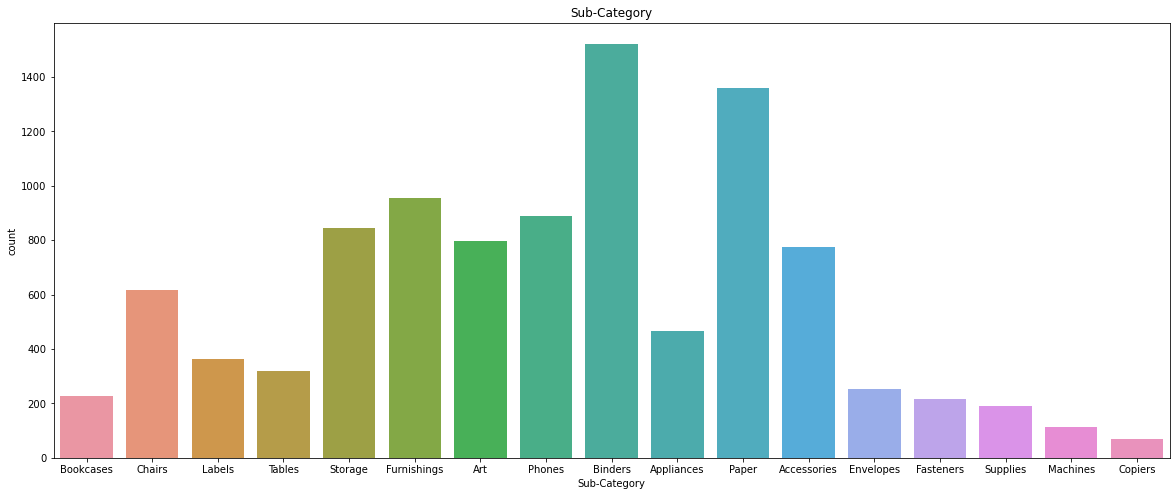

In [17]:
#As the piechart seems a bit clumsy let us use a countplot
plt.figure(figsize = (20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category')
plt.show()

We can see that more than 1400 Binders are present in the retail data set.

C:\Users\ghosh\AppData\Local\Temp/ipykernel_14776/1791214573.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 864x432 with 0 Axes>

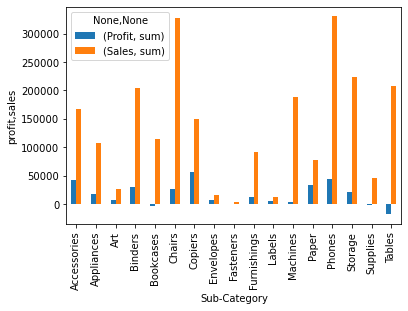

In [18]:
#now we will see tha sales of the product sub category wise
plt.figure(figsize = (12,6))
df.groupby('Sub-Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit,sales')
plt.show()

We can see that Chairs and phones have a higher sales. And in term of profit, Copiers and phones have higher profits than others. Bookcases and tables are running in loss. And for fasteners the profit is zero.

### On the basis of Region 

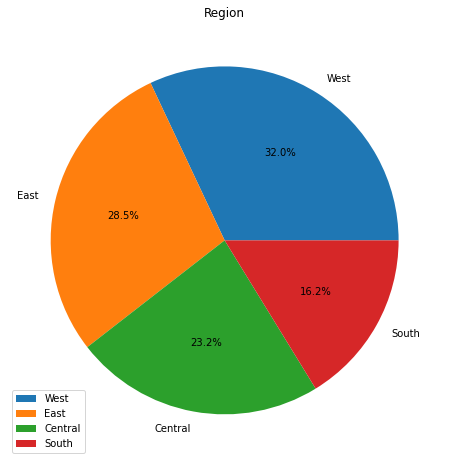

In [19]:
#let us see which region makes highest transactions
plt.figure(figsize = (8,8))
textprops = {'fontsize':10}
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().index, autopct='%1.1f%%')
plt.title('Region')
plt.legend()

The East makes highest transaction whereas south makes the lowest.

C:\Users\ghosh\AppData\Local\Temp/ipykernel_14776/3661027358.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

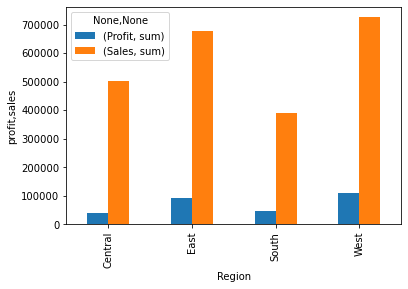

In [20]:
#let us see the profit and sales depending on the Regions
plt.figure(figsize = (10,10))
df.groupby('Region')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit,sales')
plt.show()

West makes the highest sales and profit. South makes lowest sales and Central makes lowest profit.

### On the basis of Segments 

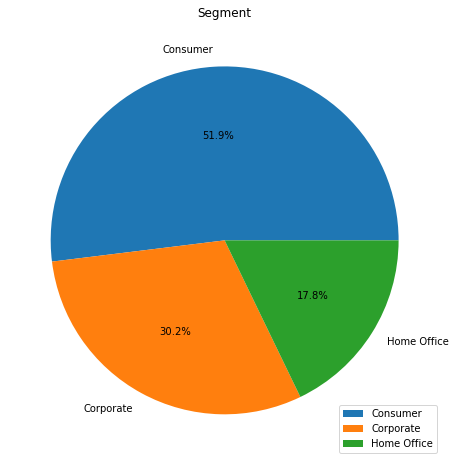

In [21]:
#to see which segment makes highest transactions
plt.figure(figsize = (8,8))
textprops = {'fontsize':10}
plt.pie(df['Segment'].value_counts(), labels = df['Segment'].value_counts().index, autopct='%1.1f%%')
plt.title('Segment')
plt.legend()

Consumers make highest transactions.

C:\Users\ghosh\AppData\Local\Temp/ipykernel_14776/3286793597.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Segment')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

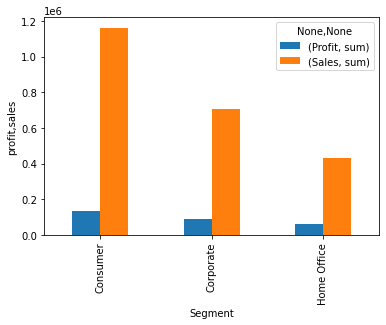

In [22]:
#let us see the profit and sales depending on the Segments
plt.figure(figsize = (10,10))
df.groupby('Segment')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit,sales')
plt.show()

Retailer sells highest to consumer and makes highest profit by selling to them.

### On the basis on States

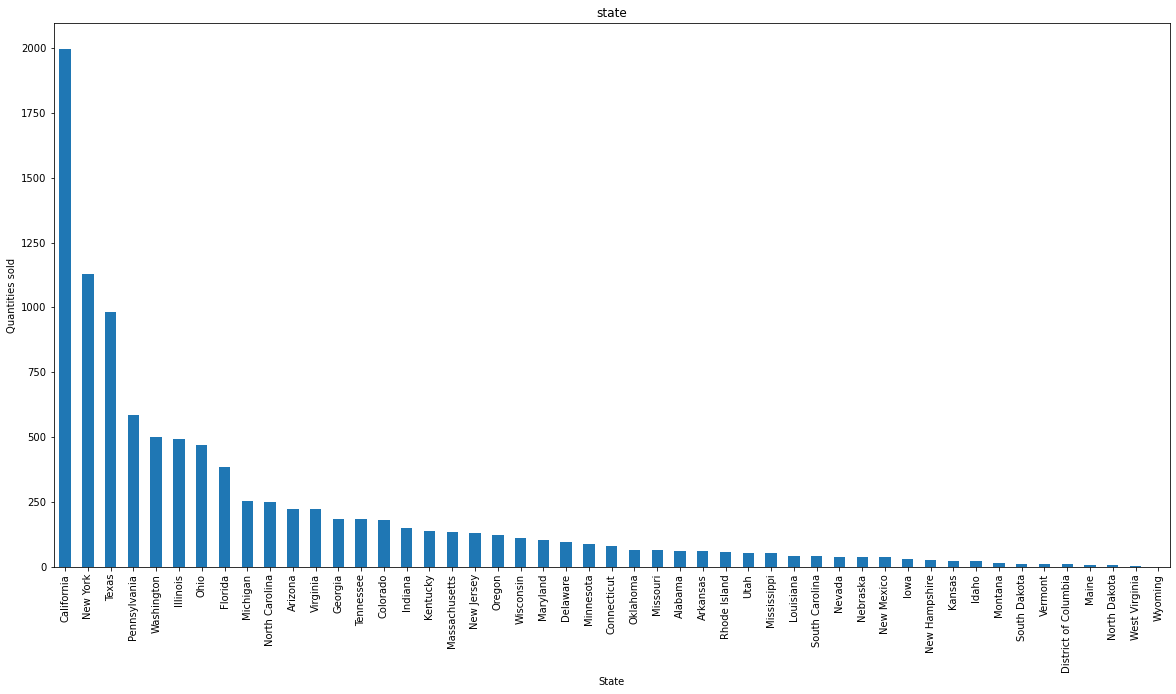

In [23]:
#let us see the total no.of quantity sold in different states
df_state = df['State'].value_counts()
df_state.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Quantities sold')
plt.xlabel('State')
plt.title('state')
plt.show()

Highest no. of quantities are sold in California.

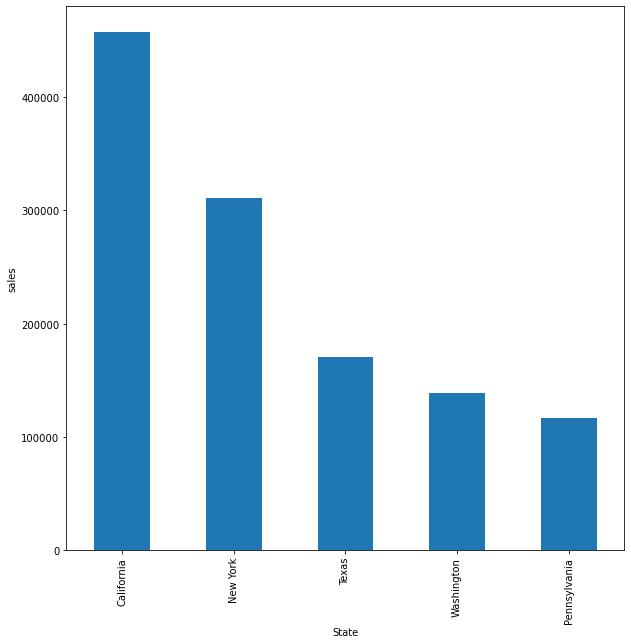

In [24]:
plt.figure(figsize = (10,10))
df.groupby(['State'])['Sales'].sum().sort_values(ascending = False).head().plot.bar()
plt.ylabel('sales')
plt.show()

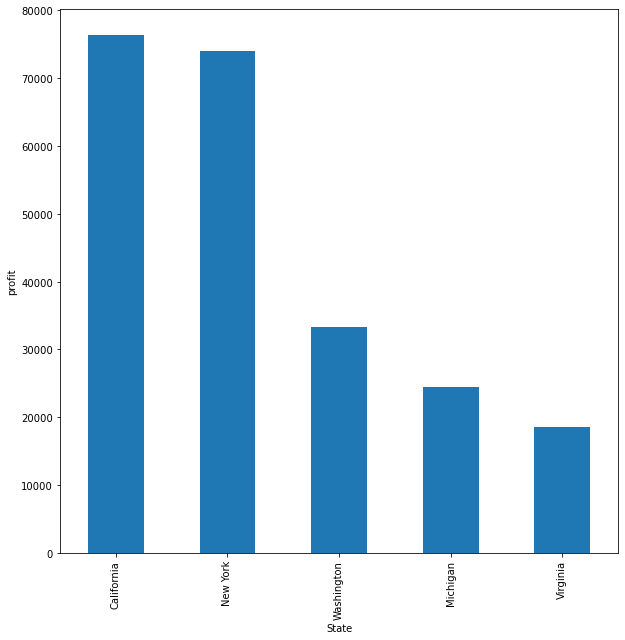

In [25]:
plt.figure(figsize = (10,10))
df.groupby(['State'])['Profit'].sum().sort_values(ascending = False).head().plot.bar()
plt.ylabel('profit')
plt.show()

California makes highest sales and profit

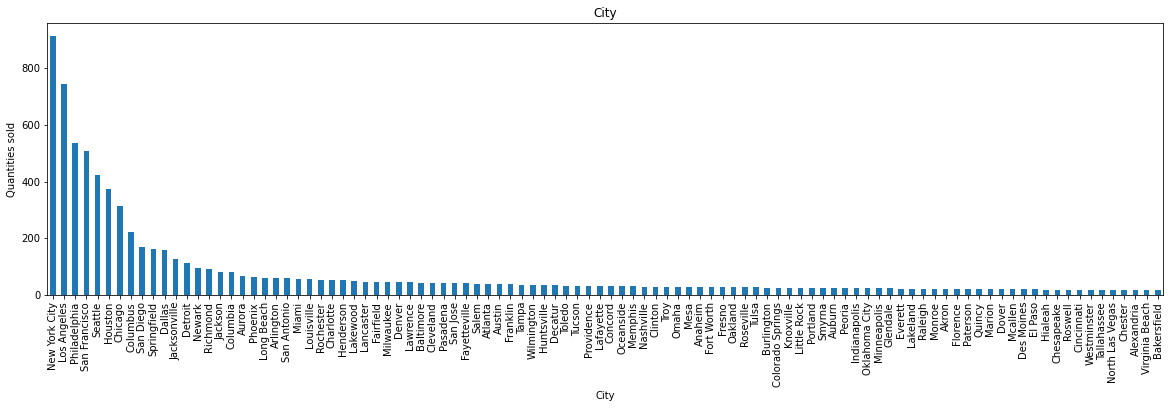

In [26]:
#let us see the total no.of quantity sold in different states
df_city = df['City'].value_counts()
df_city = df_city.head(100)
df_city.plot(kind = 'bar', figsize = (20,5))
plt.ylabel('Quantities sold')
plt.xlabel('City')
plt.title('City')
plt.show()

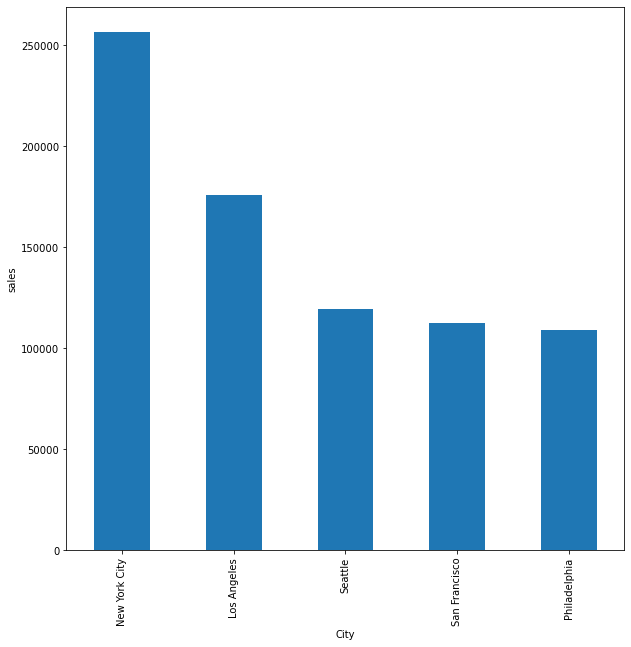

In [27]:
plt.figure(figsize = (10,10))
df.groupby(['City'])['Sales'].sum().sort_values(ascending = False).head().plot.bar()
plt.ylabel('sales')
plt.show()

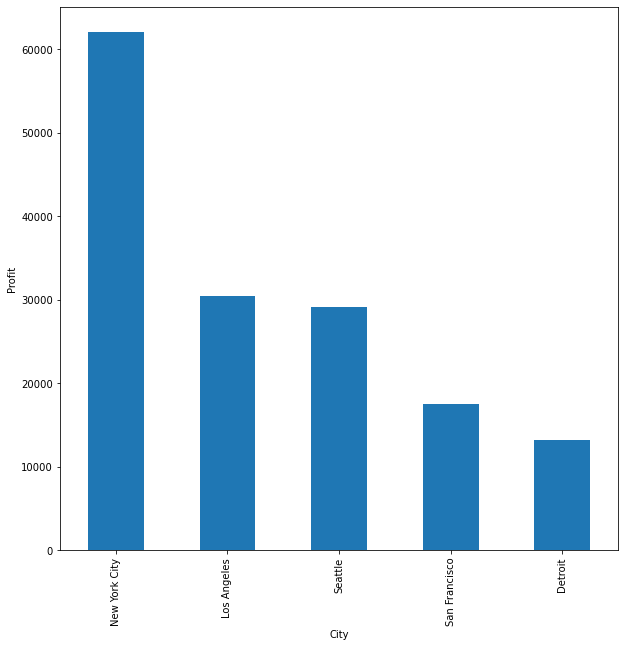

In [28]:
plt.figure(figsize = (10,10))
df.groupby(['City'])['Profit'].sum().sort_values(ascending = False).head().plot.bar()
plt.ylabel('Profit')
plt.show()

New York City makes highest transactions, highest sales, highest profit.

# CONCLUSIONS 

##### Retailer needs to make more transactions to California and New York as it gives more profit. 

##### Sell of tables and bookcases should be reduced as it adds to the loss.